In [ ]:
import wbdata
import pandas as pd
import tqdm
import numpy as np

from scipy.stats import norm, uniform, gaussian_kde, multivariate_normal
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from numba import njit
from see import see

In [48]:
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
# Components
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
import json
def txt_load(filename):
    l = []
    with open(filename, "r") as f:
        for line in f:
            l.append(line.rstrip())
    return l

def txt_dump_list(filename, item):
    with open(filename, "w") as f:
        for line in item:
            f.write(line + "\n")
    print("item saved to txt file \'"+ str(filename) +"\'")

def txt_dump_line(filename, item):
    with open(filename, "w") as f:
        f.write(item)
    print("item saved to txt file \'"+ str(filename) +"\'")

def json_load(filename):
    with open(filename, "r") as f:
        j = json.load(f)
    return j

def json_dump(filename, item):
    with open(filename, "w") as f:
        json.dump(item, f)
    print("item saved to json file \'"+ str(filename) +"\'")

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("wb_1212.csv")
df = df.sort_values(["country","year"])

# 一人当たりGDP・人口密度対数化
df["percapita"] = df["gdp"] / df["population"]
df["percapita_log"] = np.log10(df["gdp"] / df["population"] +1)
df["population_log"] = np.log10(df["population"] +1)
df["density"] = np.log10(df["LandArea"] / df["population"]+1)
df["ios"] = df["iOS"]/(df["Android"]+df["iOS"])



#Macシェア率
desktop = pd.read_csv("./osmarketshare_total-desktop.csv")
desktop["year"] = [ x.split("-")[0] for x in desktop["Date"] ]
desktop["sortname"] = desktop["Country"] + desktop["year"]
desktop = desktop.groupby(by="sortname").mean()
desktop["year"] = [ int(x[-4:]) for x in desktop.index ]

osxl = []
for x in df["sortname"]:
    osx = desktop.loc[x]["OS X"]
    osxl.append(osx)

windows = []
for x in df["sortname"]:
    win = desktop.loc[x]["Windows"]
    windows.append(win)

#言語・民族・宗教ダミー
dummies = pd.read_csv("dummies.csv")
dummies["NonReli"] = dummies["NonReli"].fillna(0)
dummies = dummies.drop(columns=["Unnamed: 0","BritanicaLink","Lang"])
ds = pd.DataFrame()
for item in df["country"].tolist():
    ds = pd.concat([ds, dummies[dummies["cs"]==item]])



df = pd.concat([
    df,ds.reset_index(), 
    pd.DataFrame(osxl, columns=["OSX"]),
    pd.DataFrame(windows, columns=["Windows"])
],axis=1)

df = df.drop(columns=["Unnamed: 0.3", "Unnamed: 0.2","Unnamed: 0.1","Unnamed: 0"])


df = df[df["year"]==2020]
df = df[df["Android"]<=df["iOS"]]
df["iOS"] = df["iOS"].map('{:,.2f}'.format)
df["Android"] = df["Android"].map('{:,.2f}'.format)
df["OSX"] = df["OSX"].map('{:,.2f}'.format)
df["Windows"] = df["Windows"].map('{:,.2f}'.format)

df = df[["country","iOS","Android","OSX","island",]].sort_values("iOS", ascending = False)

"""
fig, ax =plt.subplots(dpi=300)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,
        colLabels=["国名","iOSシェア(%)","OSX(MacOS)シェア(%)","島国"]
        )
"""

df.to_csv("table1.csv")

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("wb_1212.csv")
df = df.sort_values(["country","year"])

# 一人当たりGDP・人口密度対数化
df["percapita"] = df["gdp"] / df["population"]
df["percapita_log"] = np.log10(df["gdp"] / df["population"] +1)
df["population_log"] = np.log10(df["population"] +1)
df["density"] = np.log10(df["LandArea"] / df["population"]+1)
df["ios"] = df["iOS"]/(df["Android"]+df["iOS"])



#Macシェア率
desktop = pd.read_csv("./osmarketshare_total-desktop.csv")
desktop["year"] = [ x.split("-")[0] for x in desktop["Date"] ]
desktop["sortname"] = desktop["Country"] + desktop["year"]
desktop = desktop.groupby(by="sortname").mean()
desktop["year"] = [ int(x[-4:]) for x in desktop.index ]

osxl = []
for x in df["sortname"]:
    osx = desktop.loc[x]["OS X"]
    osxl.append(osx)

windows = []
for x in df["sortname"]:
    win = desktop.loc[x]["Windows"]
    windows.append(win)

#言語・民族・宗教ダミー
dummies = pd.read_csv("dummies.csv")
dummies["NonReli"] = dummies["NonReli"].fillna(0)
dummies = dummies.drop(columns=["Unnamed: 0","BritanicaLink","Lang"])
ds = pd.DataFrame()
for item in df["country"].tolist():
    ds = pd.concat([ds, dummies[dummies["cs"]==item]])



df = pd.concat([
    df,ds.reset_index(), 
    pd.DataFrame(osxl, columns=["OSX"]),
    pd.DataFrame(windows, columns=["Windows"])
],axis=1)

df = df.drop(columns=["Unnamed: 0.3", "Unnamed: 0.2","Unnamed: 0.1","Unnamed: 0"])


df = df[df["year"]==2020]

df[["iOS","Android","OSX","percapita_log"]].dropna().describe()

,iOS,Android,OSX,percapita_log
count,172.0000,172.0000,172.0000,172.0000
mean,19.6833,78.9312,15.1669,3.8313
std,14.7030,14.0371,8.7667,0.6382
min,2.2667,34.8625,2.0158,2.3708
25%,8.3317,73.3306,8.0469,3.3479
50%,14.4962,83.9679,12.6550,3.8356
75%,26.3367,89.0475,21.4106,4.3196
max,64.3583,97.6250,36.8542,5.2398


In [68]:
df[df["iOS"]>df["Android"]].describe()

,Android,iOS,year,gdp,population,LandArea,ChildPercentage,GovEduc,WorkingPercentage,EduDuration,...,density,ios,index,island,LangCount,EthnicCount,ReliCount,NonReli,OSX,Windows
count,17.0000,17.0000,17.0000,12.0000,15.0000,15.0000,8.0000,0.0000,8.0000,14.0000,...,15.0000,17.0000,17.0000,17.0000,17.0000,17.0000,17.0000,17.0000,17.0000,17.0000
mean,44.3250,55.2663,2020.0000,2578473098294.5269,36804534.3333,1801534.4393,16.5011,NaN,63.9411,10.4286,...,0.0192,0.5550,100.8235,0.4706,1.4706,2.1765,2.1765,15.9824,28.8282,66.8323
std,5.1670,5.0470,0.0000,5937222396874.4570,87777284.2919,3535291.2673,2.1547,NaN,2.3439,1.2225,...,0.0351,0.0514,63.3495,0.5145,0.7998,1.2367,1.3339,17.6971,3.3022,2.5989
min,34.8625,50.0208,2020.0000,3240759988.9945,33691.0000,2.0270,12.4486,NaN,59.1542,9.0000,...,0.0000,0.5019,10.0000,0.0000,1.0000,1.0000,1.0000,0.0000,21.9825,61.8258
25%,40.2958,50.9808,2020.0000,6865301325.8138,56379.0000,200.0000,15.5711,NaN,63.1776,10.0000,...,0.0014,0.5117,50.0000,0.0000,1.0000,1.0000,1.0000,0.0000,26.4808,64.7758
50%,45.5642,54.0225,2020.0000,451842734954.9085,5379475.0000,39516.0300,16.7694,NaN,64.7459,10.0000,...,0.0029,0.5425,94.0000,0.0000,1.0000,2.0000,2.0000,11.7000,28.3817,66.9983
75%,48.6525,59.5117,2020.0000,1407232980193.4727,18023354.5000,385891.7660,17.8106,NaN,65.3982,11.0000,...,0.0144,0.5963,141.0000,1.0000,2.0000,3.0000,3.0000,29.5000,30.4033,68.4050
max,49.6483,64.3583,2020.0000,20893743833000.0000,331501080.0000,9147420.0000,19.2924,NaN,66.1204,13.0000,...,0.1137,0.6486,206.0000,1.0000,4.0000,4.0000,6.0000,63.0000,34.1617,71.1233


In [ ]:
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
# 図１
#----------------------------------------------------------------------------------------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("ownership20220414_01.csv")
fig, ax = plt.subplots(dpi=300)
plt.title("")
plt.xlabel("")
plt.ylabel("")
ax.plot(df.iloc[0,:],antialiased=False, marker="o", markeredgewidth=0, label = "スマホ所持者割合(%)")
ax.legend()

ax.set_xticklabels([ str(2010+x) + "年" for x in range(13) ])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10)
ns = [2482,2174,2481,2730,2743,2420,2541,2454,4580,6045,6227,8152,6193]
items = df.iloc[0,:].tolist()
items = [ items[x]for x in range(len(items)) ]
for i, item in enumerate(items):
    if i == 0:
        ax.text(i+0.2, int(df.iloc[0,:].tolist()[i])+1, item, size="smaller")
    else:
        ax.text(i-1, int(df.iloc[0,:].tolist()[i])+0.2, item, size="smaller")


In [1]:
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
# 図2
#----------------------------------------------------------------------------------------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./osmarketshare_total.csv")
#df = df[df["year"]==2021].dropna()
df = df[df["Country"]=="Japan"].dropna()

df = df.reset_index().drop(columns=["index"])
df

fig, ax = plt.subplots(dpi=300)
plt.title("")
plt.xlabel("")
plt.ylabel("")
ax.plot(df["iOS"], label = "iOSシェア(%)")
ax.plot(df["Android"], label = "Androidシェア(%)",linestyle="dashed")


ax.set_xticks([ x*12 for x in range(14) ])
ax.set_xticklabels([ str(2009+x) + "年1月" for x in range(14) ])
xlabels = ax.get_xticklabels()
plt.setp(xlabels, rotation=45, fontsize=8)

ax.legend()



NameError: name 'pd' is not defined

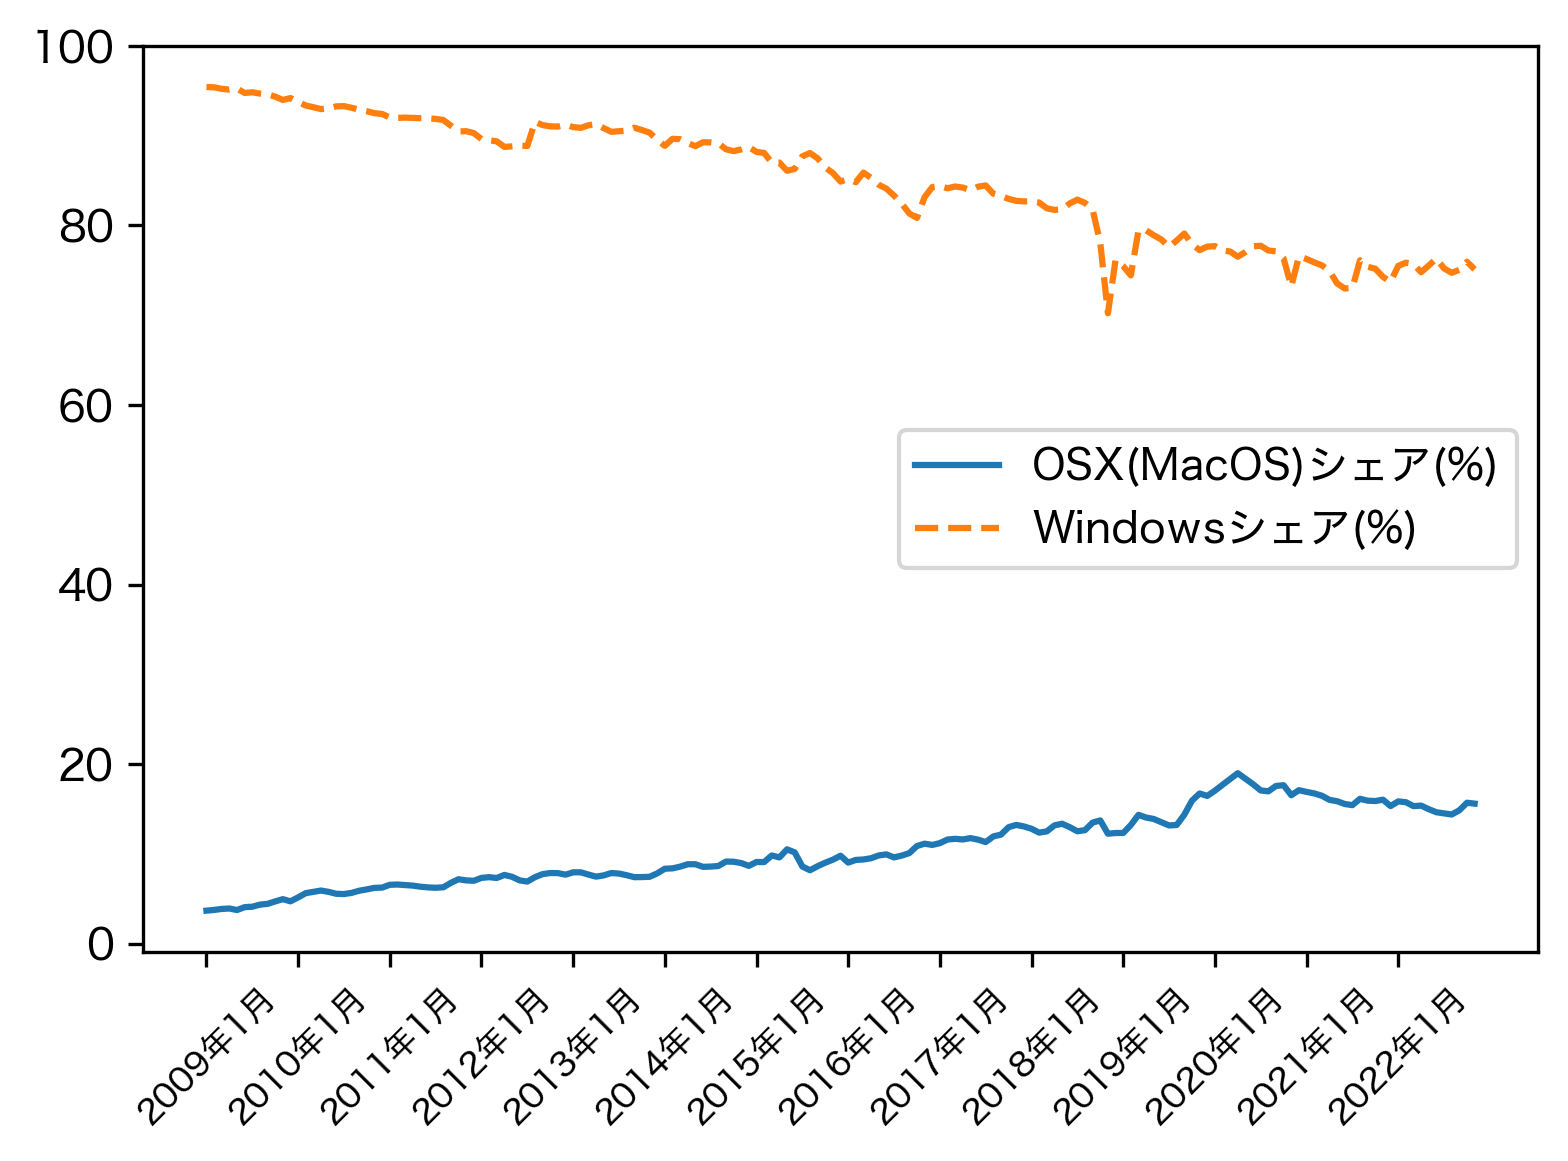

In [31]:
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
# 図2
#----------------------------------------------------------------------------------------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./osmarketshare_total-desktop.csv")
#df = df[df["year"]==2021].dropna()
df = df[df["Country"]=="worldwide"].dropna()

df = df.reset_index().drop(columns=["index"])
df

fig, ax = plt.subplots(dpi=300)
plt.title("")
plt.xlabel("")
plt.ylabel("")
ax.plot(df["OS X"], label = "OSX(MacOS)シェア(%)")
ax.plot(df["Windows"], label = "Windowsシェア(%)",linestyle="dashed")


ax.set_xticks([ x*12 for x in range(14) ])
ax.set_xticklabels([ str(2009+x) + "年1月" for x in range(14) ])
xlabels = ax.get_xticklabels()
plt.setp(xlabels, rotation=45, fontsize=8)

ax.legend()



In [ ]:
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
# 図3
#----------------------------------------------------------------------------------------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./osmarketshare_total.csv")
#df = df[df["year"]==2021].dropna()
df = df[df["Country"]=="worldwide"].dropna()

fig, ax = plt.subplots(dpi=300)
plt.title("")
plt.xlabel("")
plt.ylabel("")
ax.plot(df["iOS"], label = "iOSシェア(%)")
ax.plot(df["Android"], label = "Androidシェア(%)",linestyle="dashed")


ax.set_xticks([ x*12 for x in range(14) ])
ax.set_xticklabels([ str(2009+x) + "年1月" for x in range(14) ])
xlabels = ax.get_xticklabels()
plt.setp(xlabels, rotation=45, fontsize=8)

ax.legend()